# Advance Regression Assignment-Part 1

# Surprise Housing - Assignment
### The solution is divided into the following sections:

1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation

#### Data Understanding and Exploration
Let's have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score, mean_squared_error


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
surprise_data = pd.read_csv("./train.csv")
surprise_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#check missing percentage
percent_missing = (surprise_data.isnull().sum() / surprise_data.isnull().count()*100).sort_values(ascending = False)
percent_missing

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

#### Data cleaning
Let's start with cleaning the columns with missing values

In [4]:
# Dropping Columns with high missing values ,above 40%
surprise_dataclean=surprise_data.copy()
surprise_dataclean.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [5]:
percent_missing = (surprise_dataclean.isnull().sum() / surprise_dataclean.isnull().count()*100).sort_values(ascending = False)
percent_missing

LotFrontage      17.739726
GarageFinish      5.547945
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
                   ...    
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
SaleCondition     0.000000
Id                0.000000
Length: 76, dtype: float64

In [6]:
surprise_dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
 #Treating missing values by imputing for columns with missing values 

surprise_dataclean['LotFrontage']= surprise_dataclean.LotFrontage.fillna(surprise_dataclean.LotFrontage.median()) 
surprise_dataclean['MasVnrArea']= surprise_dataclean.MasVnrArea.fillna(surprise_dataclean.MasVnrArea.median())  
surprise_dataclean['GarageYrBlt']= surprise_dataclean.GarageYrBlt.fillna(surprise_dataclean.GarageYrBlt.median()) 

In [8]:
#check missing percentage
percent_missing = (surprise_dataclean.isnull().sum() / surprise_dataclean.isnull().count()*100).sort_values(ascending = False)
percent_missing

GarageQual      5.547945
GarageType      5.547945
GarageFinish    5.547945
GarageCond      5.547945
BsmtExposure    2.602740
                  ...   
FullBath        0.000000
HalfBath        0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
Id              0.000000
Length: 76, dtype: float64

In [9]:
#Cases when the house doesn't have the garrage so replacing null with No Garrage

surprise_dataclean['GarageType'] = surprise_dataclean['GarageType'].replace(np.nan, 'No Garage')
surprise_dataclean['GarageFinish'] = surprise_dataclean['GarageFinish'].replace(np.nan, 'No Garage')
surprise_dataclean['GarageCond'] = surprise_dataclean['GarageCond'].replace(np.nan, 'No Garage')
surprise_dataclean['GarageQual'] = surprise_dataclean['GarageQual'].replace(np.nan, 'No Garage')

In [10]:
#check missing percentage
percent_missing = (surprise_dataclean.isnull().sum() / surprise_dataclean.isnull().count()*100).sort_values(ascending = False)
percent_missing

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
                  ...   
KitchenAbvGr    0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
Id              0.000000
Length: 76, dtype: float64

In [11]:
# Cases when the house doesn't have the basement so replacing null with No Basement

surprise_dataclean['BsmtExposure'] = surprise_dataclean['BsmtExposure'].replace(np.nan, 'No Basement')
surprise_dataclean['BsmtFinType2'] = surprise_dataclean['BsmtFinType2'].replace(np.nan, 'No Basement')
surprise_dataclean['BsmtFinType1'] = surprise_dataclean['BsmtFinType1'].replace(np.nan, 'No Basement')
surprise_dataclean['BsmtCond'] = surprise_dataclean['BsmtCond'].replace(np.nan, 'No Basement')
surprise_dataclean['BsmtQual'] = surprise_dataclean['BsmtQual'].replace(np.nan, 'No Basement')

In [12]:
#check missing percentage
percent_missing = (surprise_dataclean.isnull().sum() / surprise_dataclean.isnull().count()*100).sort_values(ascending = False)
percent_missing

MasVnrType      0.547945
Electrical      0.068493
SalePrice       0.000000
ExterCond       0.000000
RoofStyle       0.000000
                  ...   
KitchenAbvGr    0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
Id              0.000000
Length: 76, dtype: float64

In [13]:
print('MasVnrType mode :',surprise_dataclean['MasVnrType'].mode())
print('Electrical :',surprise_dataclean['Electrical'].mode())

MasVnrType mode : 0    None
dtype: object
Electrical : 0    SBrkr
dtype: object


In [14]:
# replacing nan with the top option of this field
surprise_dataclean['MasVnrType'] = surprise_dataclean['MasVnrType'].replace(np.nan,'None') 
surprise_dataclean['Electrical'] = surprise_dataclean['Electrical'].replace(np.nan,'SBrkr')

In [15]:
#check missing percentage
percent_missing = (surprise_dataclean.isnull().sum() / surprise_dataclean.isnull().count()*100).sort_values(ascending = False)
percent_missing

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 76, dtype: float64

### All the missing values has been treated

In [16]:
#all null values treated
#changing num to categorical so as to form these as dummy variables 
surprise_dataclean['MSSubClass']=surprise_dataclean['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

surprise_dataclean['OverallQual']=surprise_dataclean['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
surprise_dataclean['OverallCond']=surprise_dataclean['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

surprise_dataclean.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch  \
0      Reg         Lvl    AllPub    Inside  ...             0         0   
1      Reg         Lvl    AllPub       FR2  ...             0         0   
2      IR1         Lvl    AllPub    Inside  ...             0         0   
3      IR1         Lvl    AllPub    Corner  ...           272         0   
4      IR1         Lvl    AllPub       FR2  ...             0         0   

  ScreenPorch PoolArea MiscVal MoSold YrSold SaleType  SaleCondition  \
0           0        0       0      2   2008       WD         Normal   
1           0        0       0      5   2007       WD         Normal   
2           0        0       0      9   2008       WD         Normal   
3           0        0       0      2   2006       WD        Abnorml   
4           0        0       0     12   2008       WD         Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 76 columns]

In [17]:
#dropping ID
surprise_dataclean.drop(['Id'],axis=1,inplace=True)

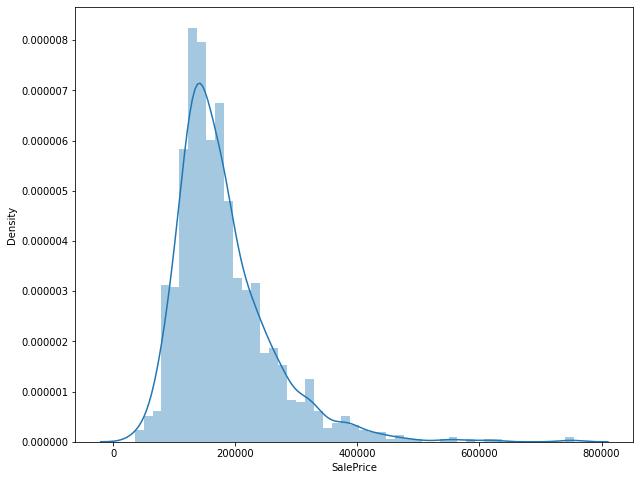

In [18]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(surprise_dataclean['SalePrice'])
plt.show()



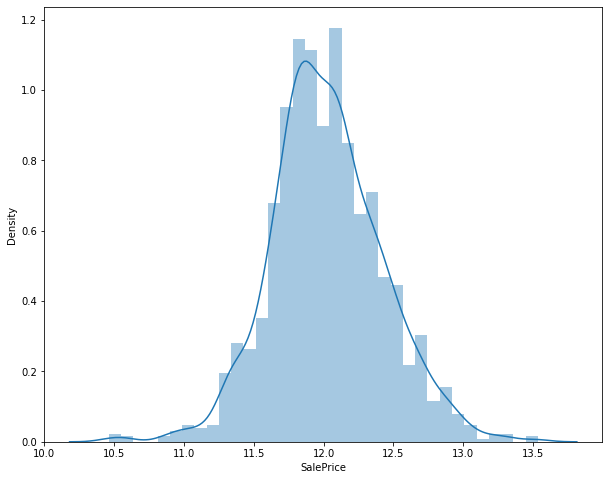

In [19]:
#we can see skewness in data so tranforming SalePrice to grid
surprise_dataclean['SalePrice'] = np.log(surprise_dataclean['SalePrice'])
plt.figure(figsize=[10,8])
sns.distplot(surprise_dataclean['SalePrice'])
plt.show()

In [20]:
#SalesPrice is now almost normally distributed
surprise_dataclean.head()


MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope  ... EnclosedPorch  \
0      Reg         Lvl    AllPub    Inside       Gtl  ...             0   
1      Reg         Lvl    AllPub       FR2       Gtl  ...             0   
2      IR1         Lvl    AllPub    Inside       Gtl  ...             0   
3      IR1         Lvl    AllPub    Corner       Gtl  ...           272   
4      IR1         Lvl    AllPub       FR2       Gtl  ...             0   

  3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold  SaleType  \
0         0           0        0       0      2   2008        WD   
1         0           0        0       0      5   2007        WD   
2         0           0        0       0      9   2008        WD   
3         0           0        0       0      2   2006        WD   
4         0           0        0       0     12   2008        WD   

   SaleCondition  SalePrice  
0         Normal  12.247694  
1         Normal  12.109011  
2         Normal  12.317167  
3        Abnorml  11.849398  
4         Normal  12.429216  

[5 rows x 75 columns]

In [21]:
surprise_dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [22]:
# Converting years to age
surprise_dataclean['YearBuilt_Age'] = surprise_dataclean['YearBuilt'].max() - surprise_dataclean['YearBuilt']
surprise_dataclean['Age'] = surprise_dataclean['YrSold'] - surprise_dataclean['YearBuilt']
surprise_dataclean['YearRemodAdd_Age'] = surprise_dataclean['YearRemodAdd'].max() - surprise_dataclean['YearRemodAdd']
surprise_dataclean['YrSold_Age'] = surprise_dataclean['YrSold'].max() - surprise_dataclean['YrSold']
surprise_dataclean['GarageYrBlt_Age'] = surprise_dataclean['GarageYrBlt'].max() - surprise_dataclean['GarageYrBlt']
# Dropping columns
surprise_dataclean.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','YrSold','YearBuilt'], axis=1, inplace = True)
surprise_dataclean.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521  ...   
std     441.866955   438.705324   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000   795.750000   882.000000     0.000000      0.000000  ...   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000  ...   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000  ...   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000  ...   

       ScreenPorch     PoolArea       MiscVal       MoSold    SalePrice  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918    12.024051   
std      55.757415    40.177307    496.123024     2.703626     0.399452   
min       0.000000     0.000000      0.000000     1.000000    10.460242   
25%       0.000000     0.000000      0.000000     5.000000    11.775097   
50%       0.000000     0.000000      0.000000     6.000000    12.001505   
75%       0.000000     0.000000      0.000000     8.000000    12.273731   
max     480.000000   738.000000  15500.000000    12.000000    13.534473   

       YearBuilt_Age          Age  YearRemodAdd_Age   YrSold_Age  \
count    1460.000000  1460.000000       1460.000000  1460.000000   
mean       38.732192    36.547945         25.134247     2.184247   
std        30.202904    30.250152         20.645407     1.328095   
min         0.000000     0.000000          0.000000     0.000000   
25%        10.000000     8.000000          6.000000     1.000000   
50%        37.000000    35.000000         16.000000     2.000000   
75%        56.000000    54.000000         43.000000     3.000000   
max       138.000000   136.000000         60.000000     4.000000   

       GarageYrBlt_Age  
count      1460.000000  
mean         31.410959  
std          23.997022  
min           0.000000  
25%           9.000000  
50%          30.000000  
75%          48.000000  
max         110.000000  

[8 rows x 35 columns]

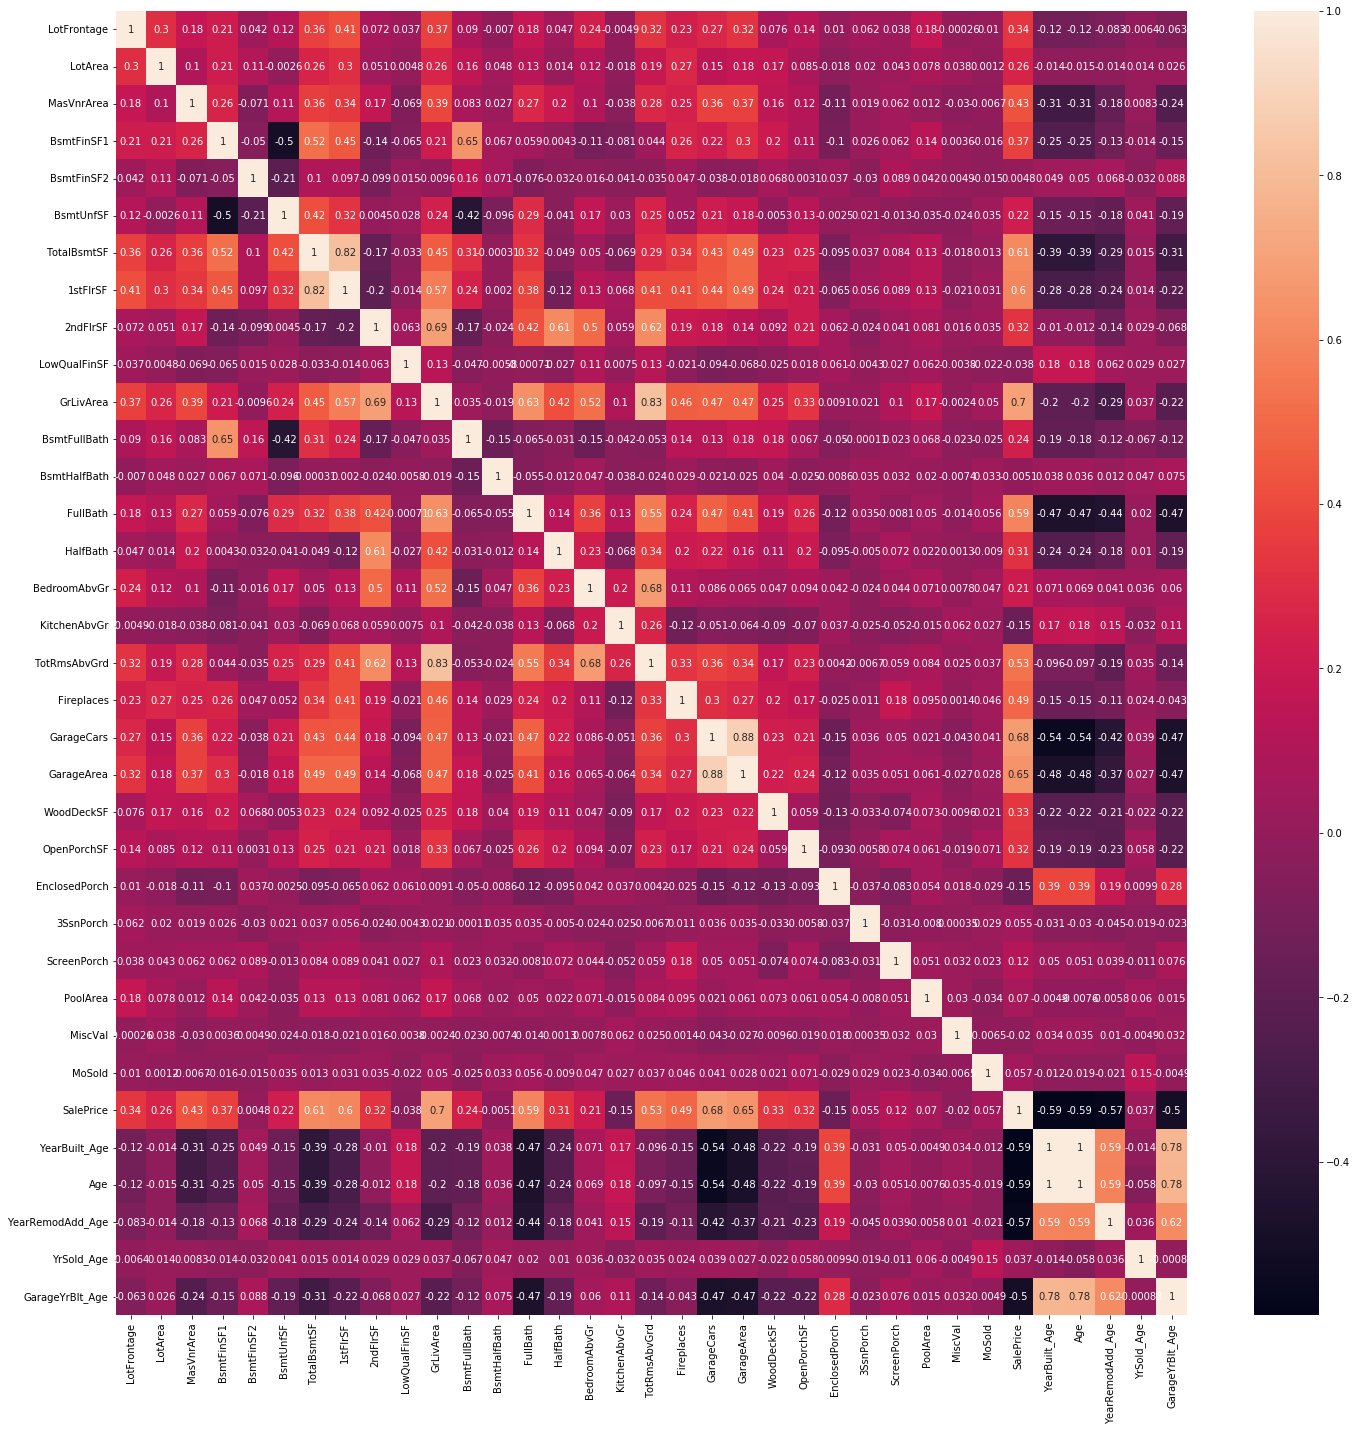

In [23]:
#checking corelation and dropping extra columns
plt.figure(figsize=(24, 24))
sns.heatmap(surprise_dataclean.corr(), annot = True)
plt.show()

In [24]:
#generating list of numerical and non-numerical columns
CatCols = []
NumCols = []

for col in list(surprise_dataclean):
    if surprise_dataclean[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',CatCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal

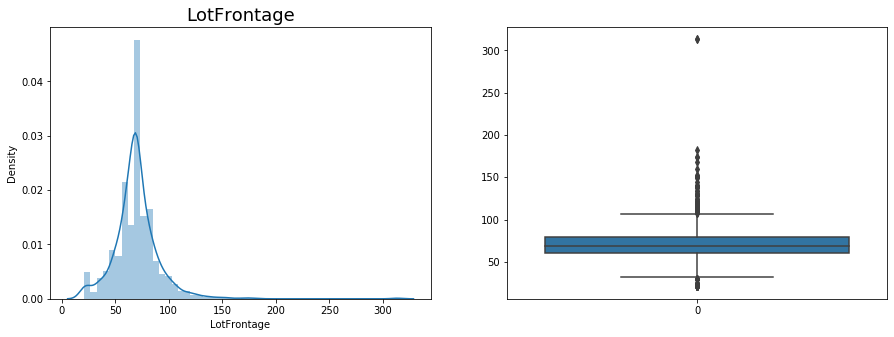

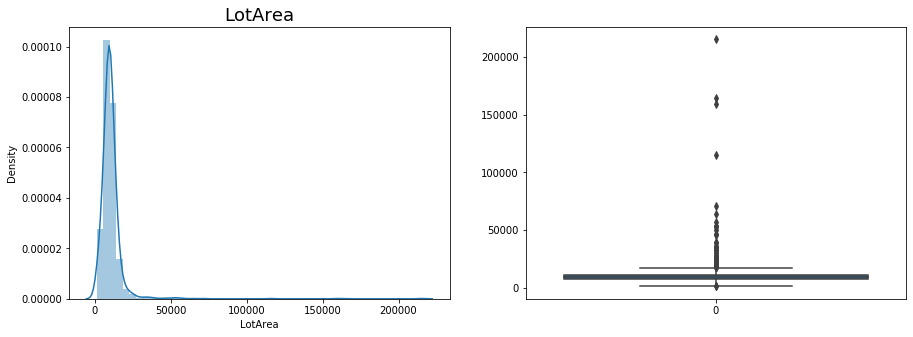

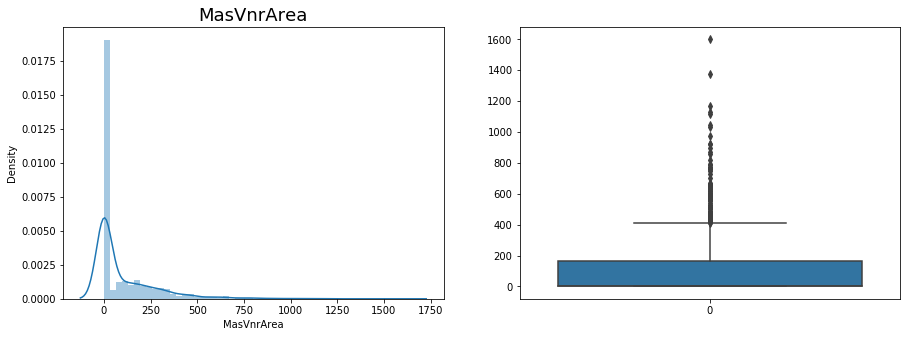

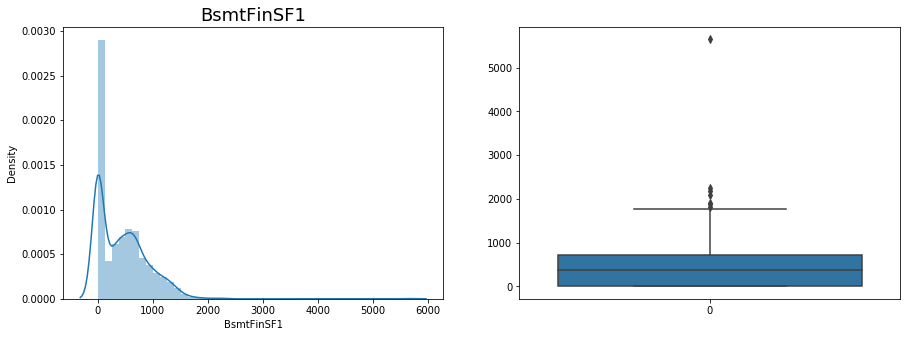

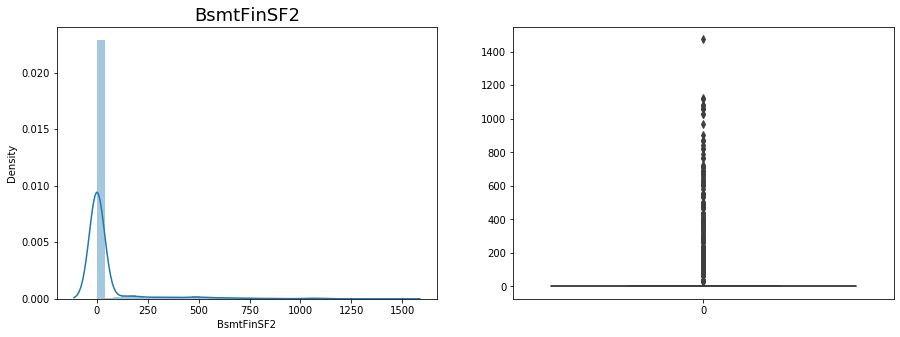

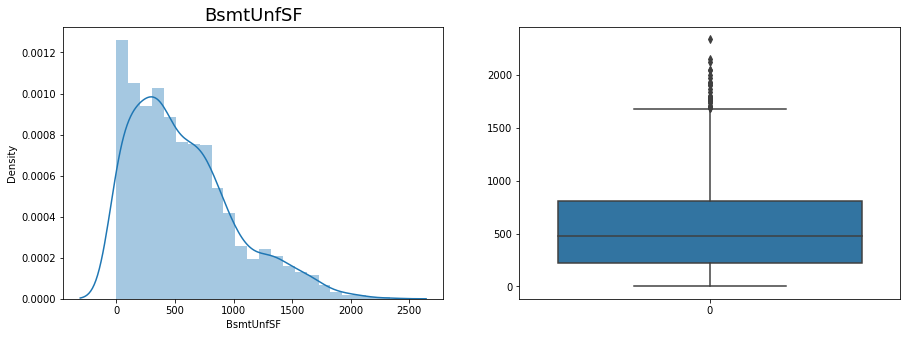

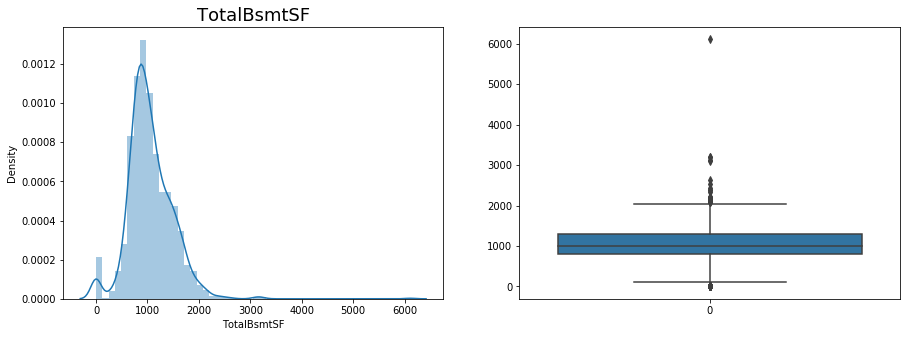

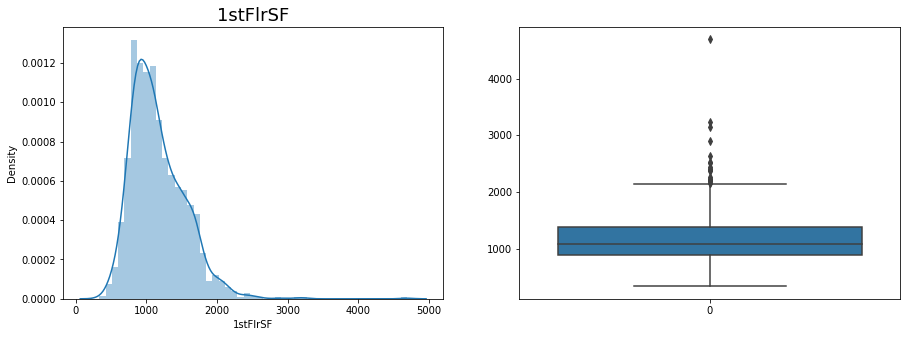

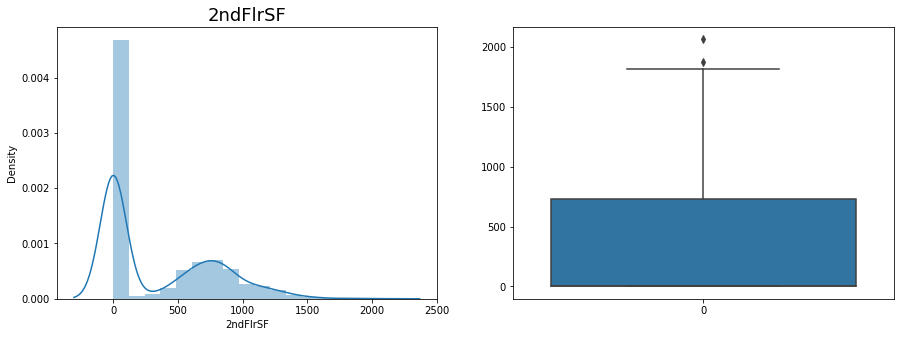

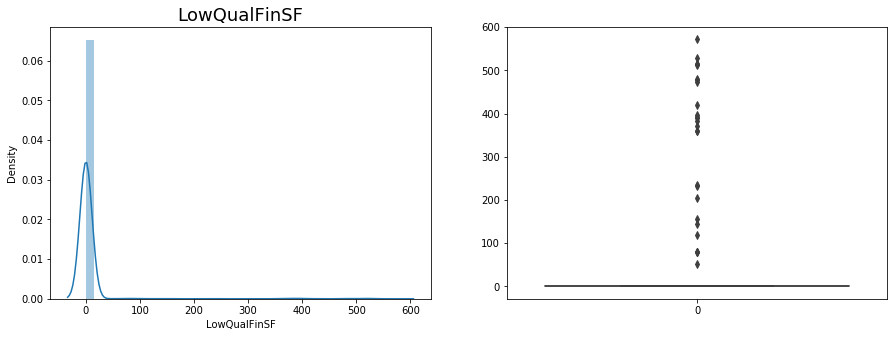

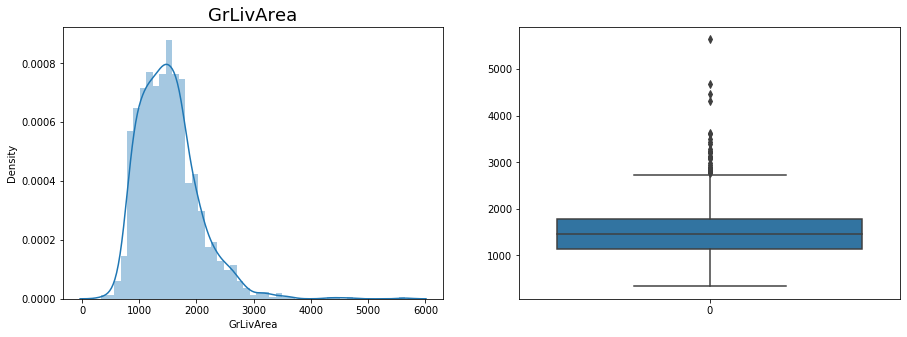

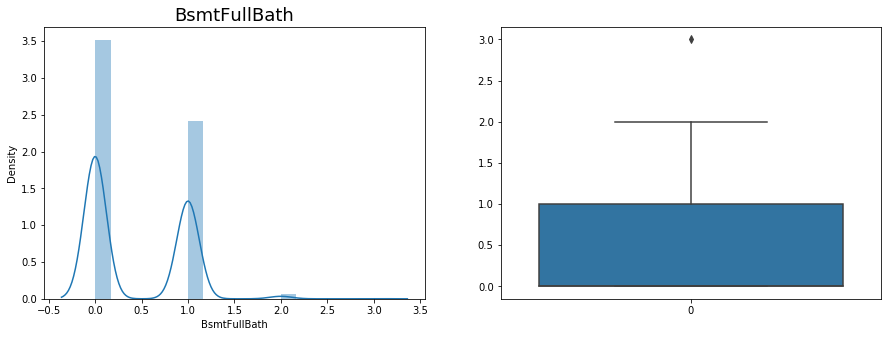

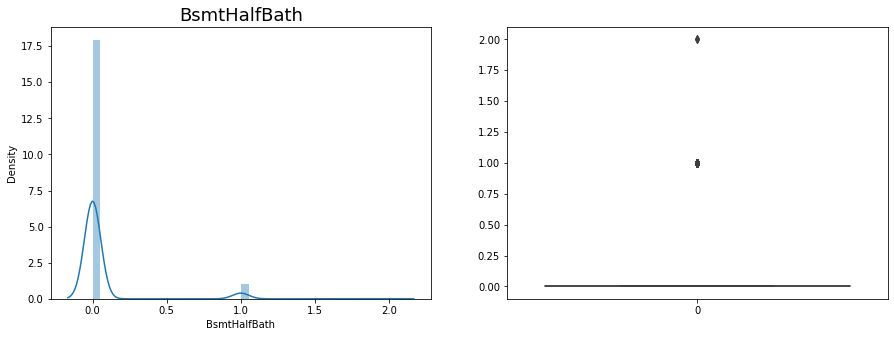

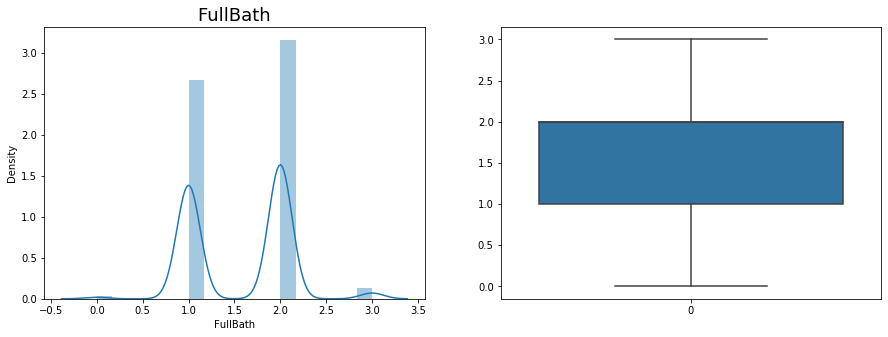

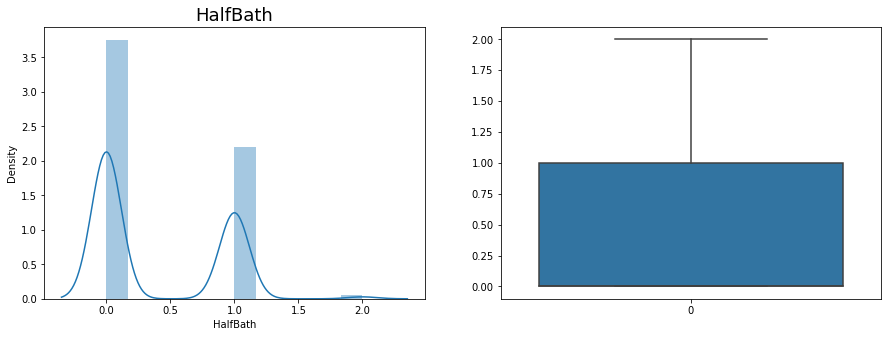

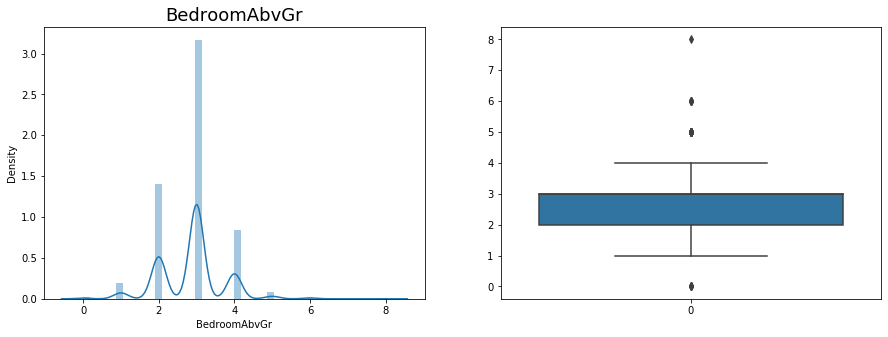

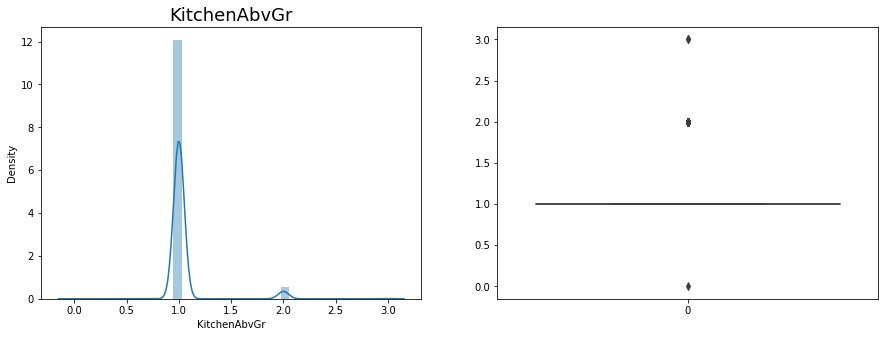

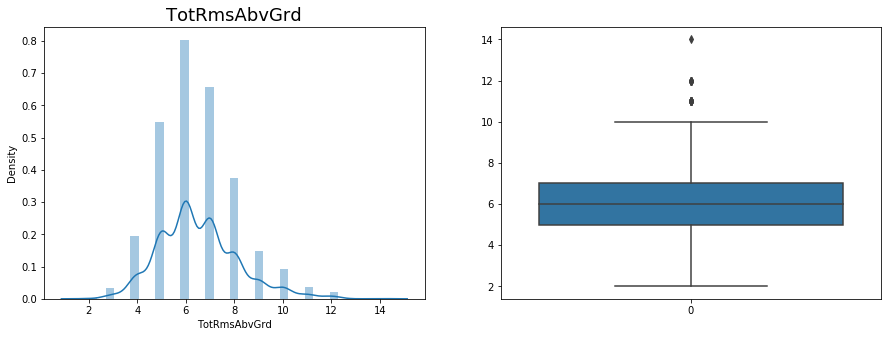

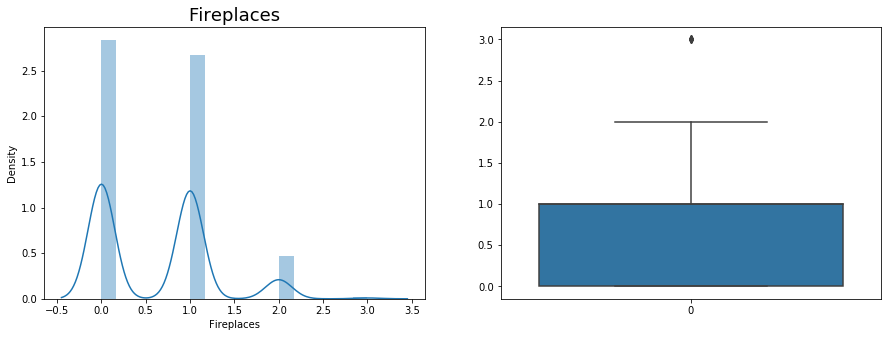

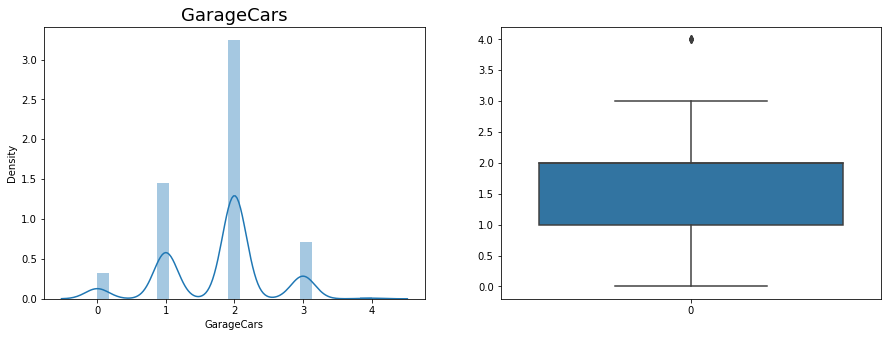

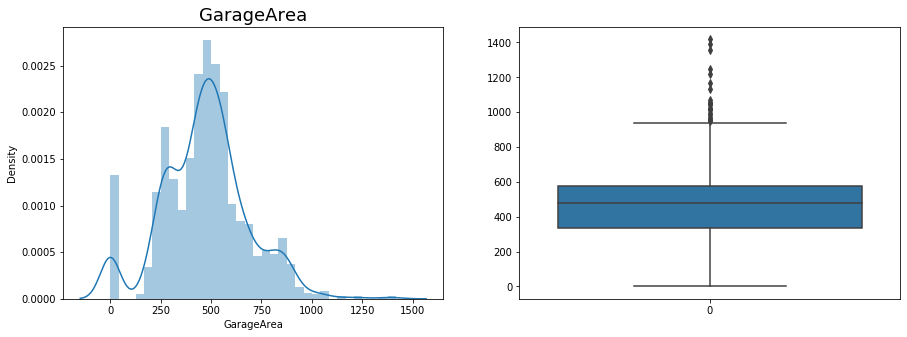

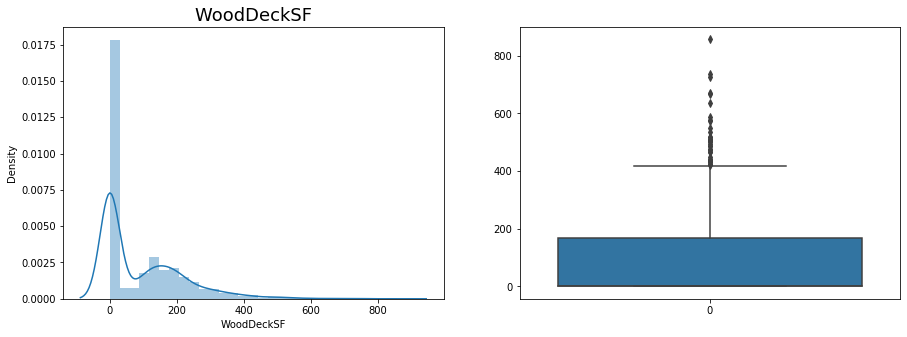

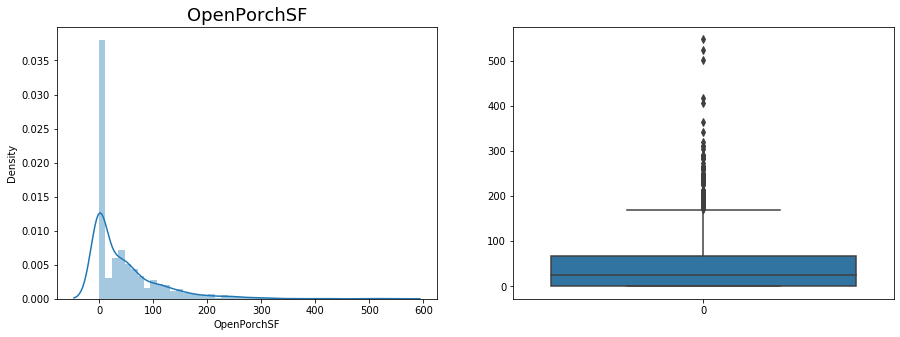

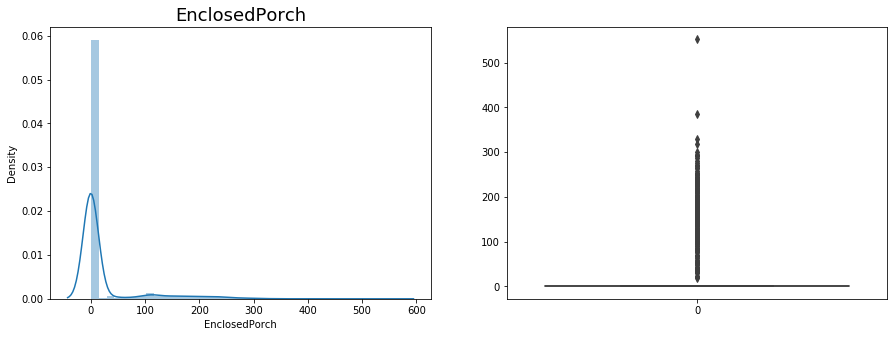

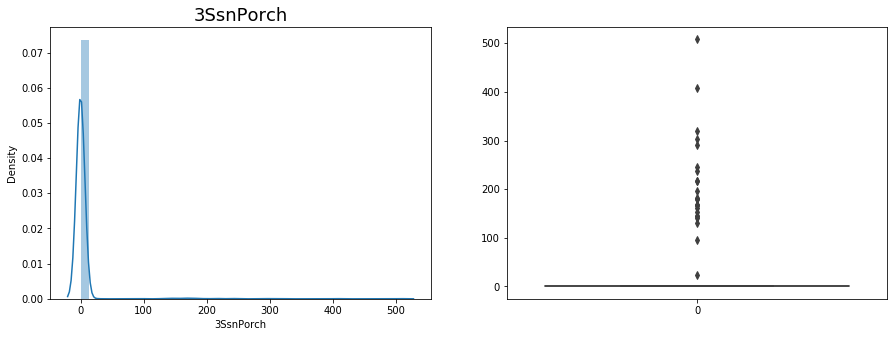

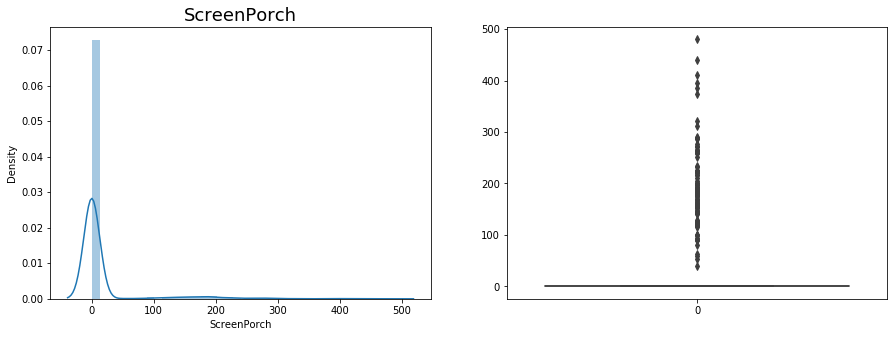

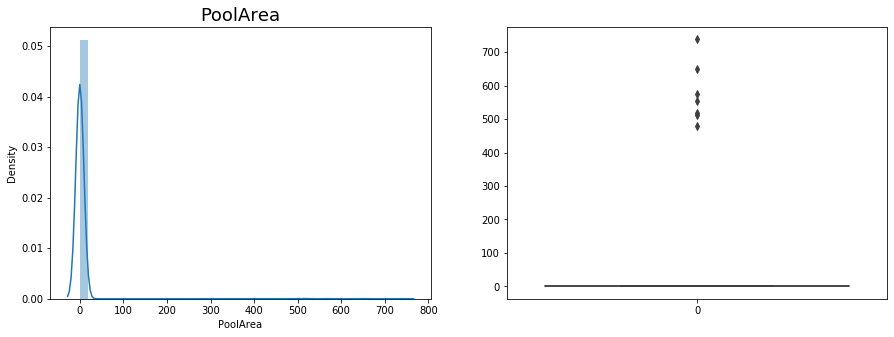

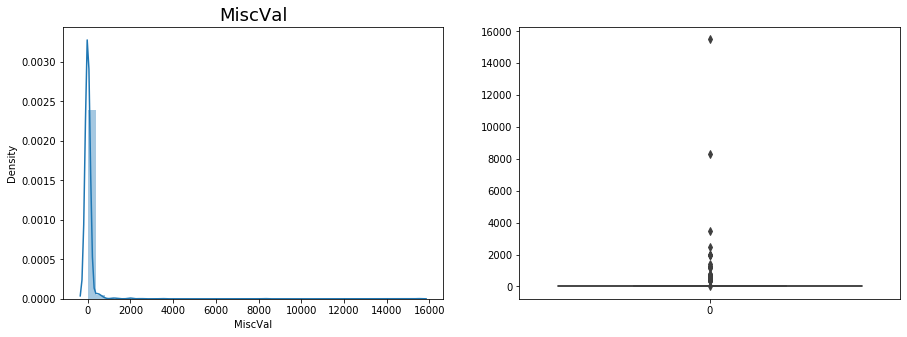

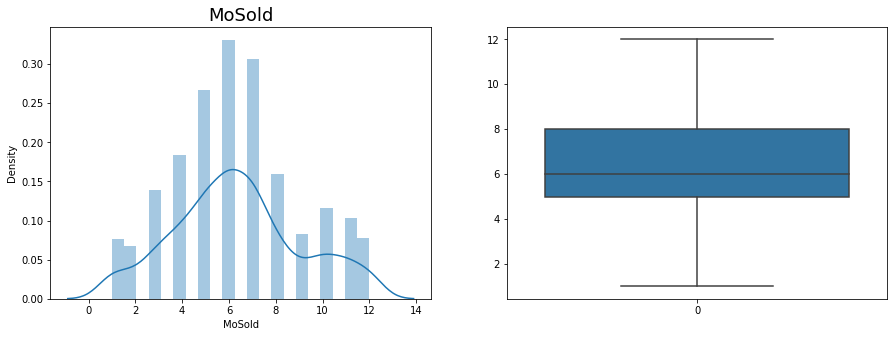

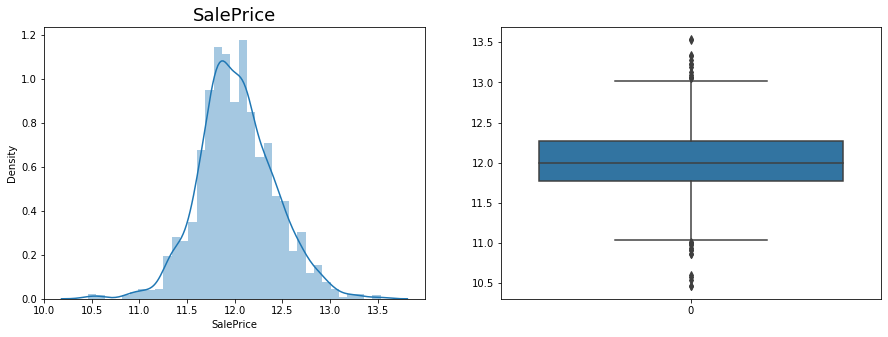

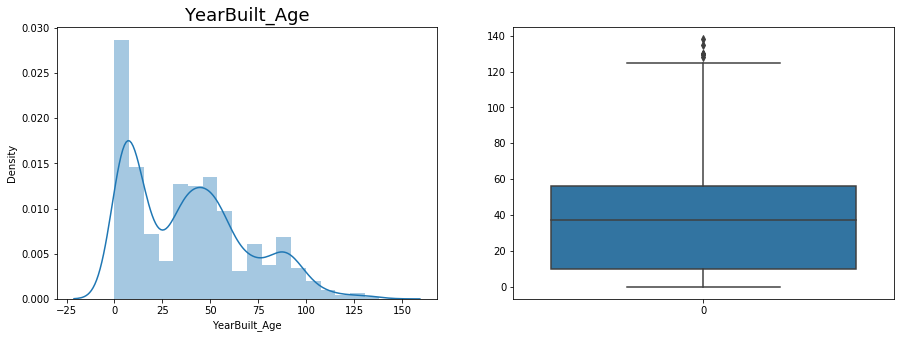

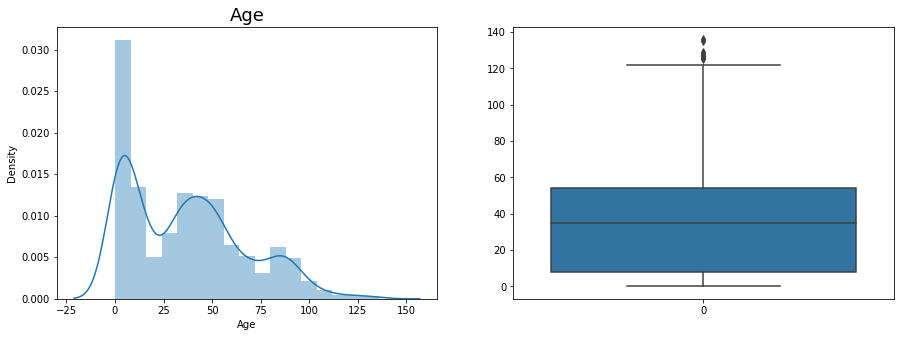

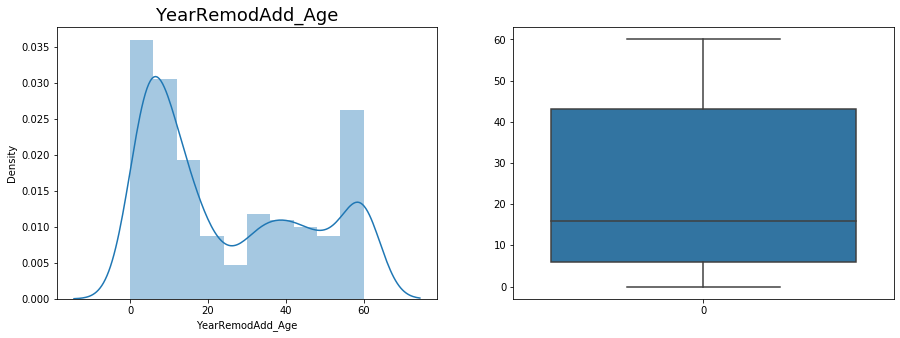

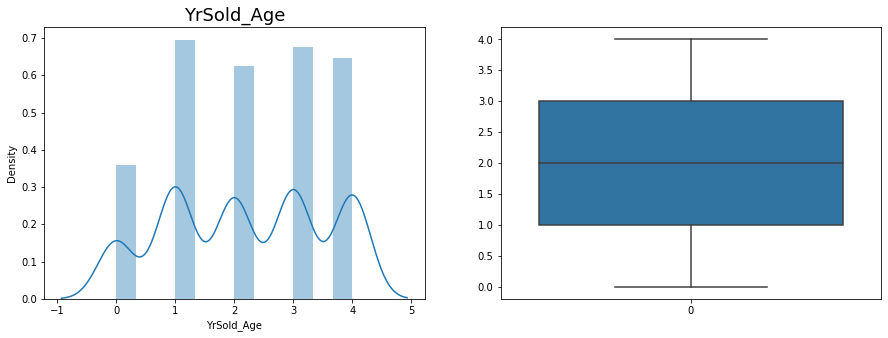

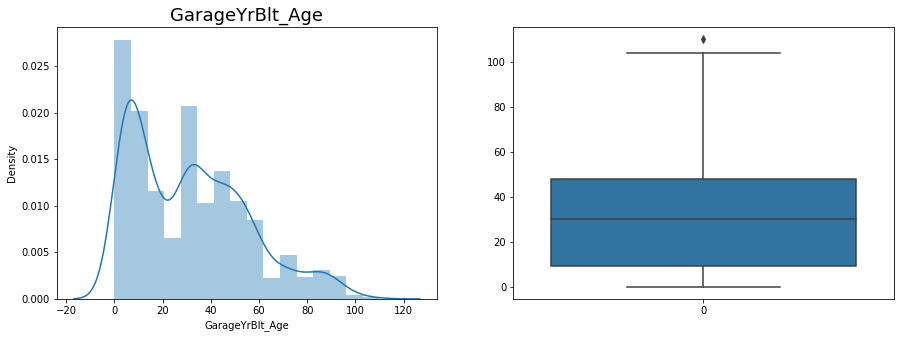

In [25]:
#checking for outliers in nueric columns
for col in surprise_dataclean[NumCols].columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(surprise_dataclean[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(surprise_dataclean[col])
    plt.show()    

There are outliers for all numerical columns, handling outliers below:

In [26]:
# Capping outliers to 5% at lower bound and 95% at upper bound
for col in surprise_dataclean[NumCols].columns:
    surprise_dataclean[col][surprise_dataclean[col] <= surprise_dataclean[col].quantile(0.05)] = surprise_dataclean[col].quantile(0.05)
    surprise_dataclean[col][surprise_dataclean[col] >= surprise_dataclean[col].quantile(0.95)] = surprise_dataclean[col].quantile(0.95)

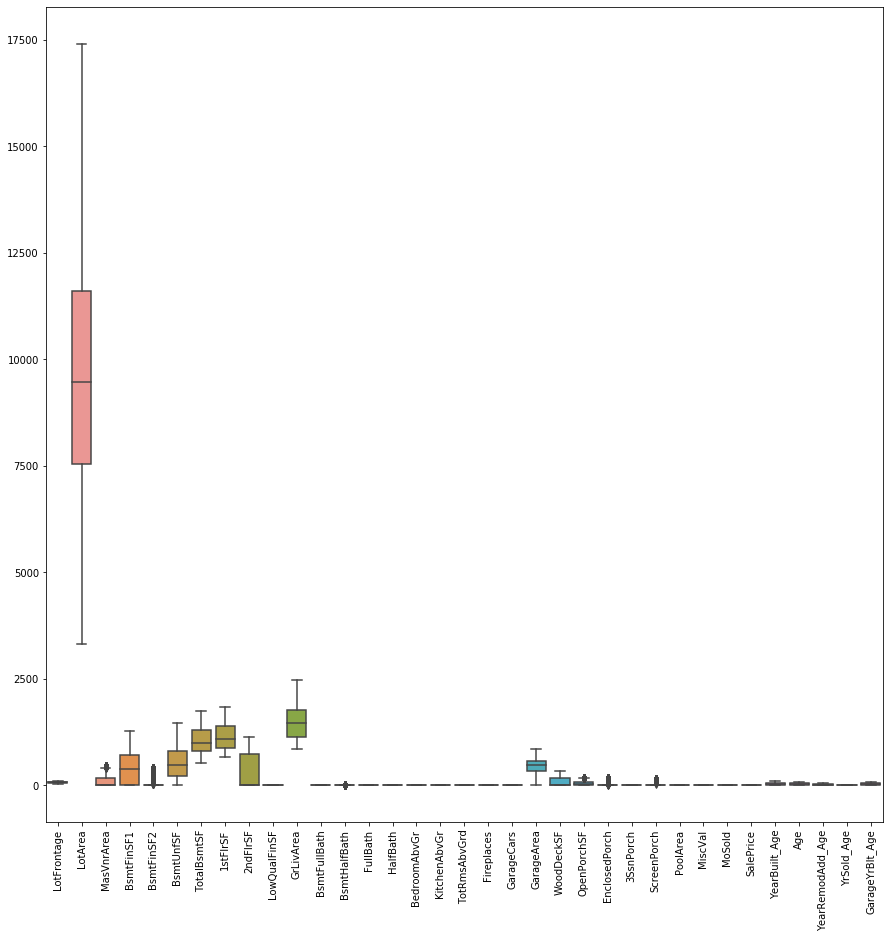

In [27]:
#checking for outliers in nueric columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=surprise_dataclean[NumCols]) 
plt.show()

All outliers for numerical columns handled.

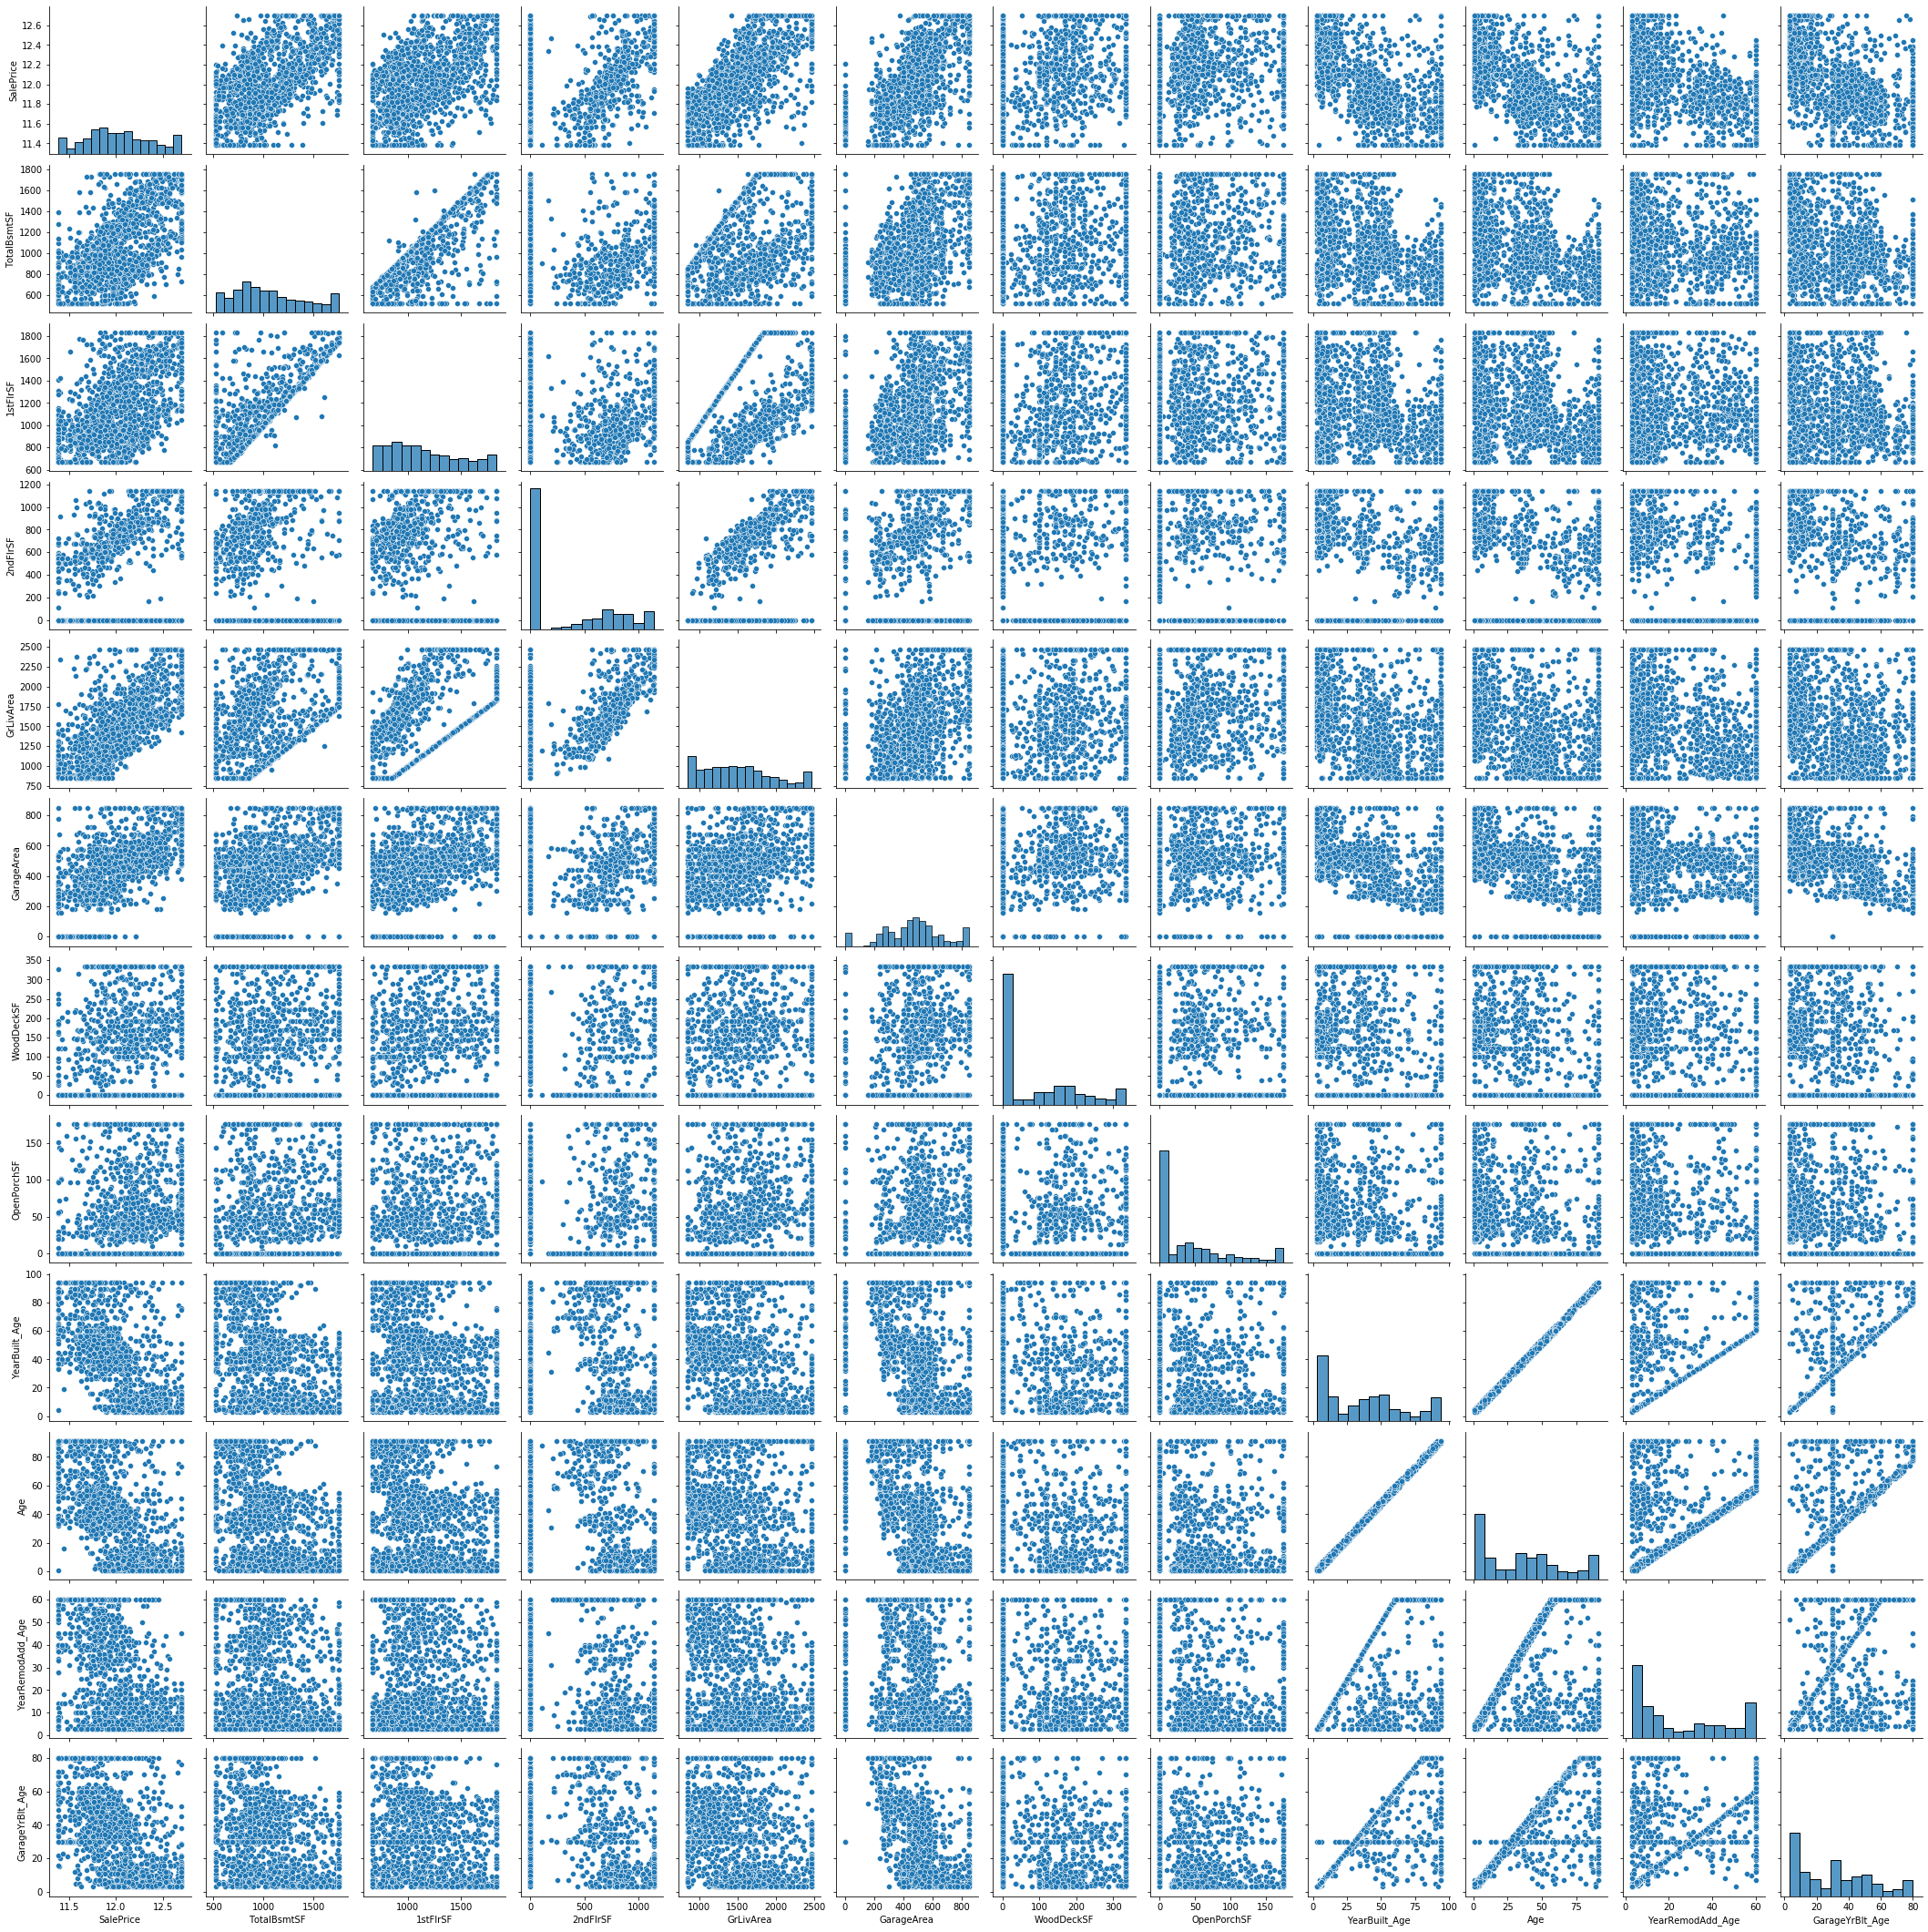

In [28]:
#checking relationship for some numeric variables of the dataset using pairplot 
sns.pairplot(surprise_dataclean,vars=['SalePrice',
                                      'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',                                     
                                       'YearBuilt_Age', 'Age', 'YearRemodAdd_Age', 'GarageYrBlt_Age'])
plt.show()

##### There are a few numerical columns which have linear relationship with target variable.

In [29]:
## One hot encoding the categorical columns
surprise_data_cat_encoded = pd.get_dummies(surprise_dataclean[CatCols], drop_first=True)
surprise_data_cat_encoded.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 236 columns

In [30]:
# Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([surprise_dataclean[NumCols], surprise_data_cat_encoded], axis=1)
df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0   8450.0       196.0         706         0.0        150   
1         80.0   9600.0         0.0         978         0.0        284   
2         68.0  11250.0       162.0         486         0.0        434   
3         60.0   9550.0         0.0         216         0.0        540   
4         84.0  14260.0       350.0         655         0.0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0        856.0     856.0     854.0             0  ...               0   
1       1262.0    1262.0       0.0             0  ...               0   
2        920.0     920.0     866.0             0  ...               0   
3        756.0     961.0     756.0             0  ...               0   
4       1145.0    1145.0    1053.0             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 271 columns]

In [31]:
#data ready for model building
# X contains all independent variables use to make predictions except 'SalePrice' (target variable)
X = df.drop(["SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0   8450.0       196.0         706         0.0        150   
1         80.0   9600.0         0.0         978         0.0        284   
2         68.0  11250.0       162.0         486         0.0        434   
3         60.0   9550.0         0.0         216         0.0        540   
4         84.0  14260.0       350.0         655         0.0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0        856.0     856.0     854.0             0  ...               0   
1       1262.0    1262.0       0.0             0  ...               0   
2        920.0     920.0     866.0             0  ...               0   
3        756.0     961.0     756.0             0  ...               0   
4       1145.0    1145.0    1053.0             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 270 columns]

In [32]:
## Separate out the target variable as y which we want to predict
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10, shuffle=True)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 270)
X_test Shape: (438, 270)
y_train Shape: (1021,)
y_test Shape: (438,)


In [34]:
scaler = StandardScaler()
#generating list of numerical and non-numerical columns
CatCols = []
NumCols = []

for col in list(X_train):
    if X_train[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)


In [35]:
## Scale the numerical columns 
X_train[NumCols] = scaler.fit_transform(X_train[NumCols])
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
912    -1.085995 -1.034528   -0.664150    0.132335   -0.306519  -0.686390   
373     0.593698  0.264613   -0.664150   -0.014186    1.577797  -1.358343   
20      1.913456  1.295234    2.024074   -1.042236   -0.306519   1.430624   
800     0.593698  0.887417   -0.664150    0.067481   -0.306519  -0.987444   
152    -0.006193  1.464461    1.118567   -0.043010   -0.306519  -0.373293   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
912    -0.837753 -0.418870 -0.815991           0.0  ...       -0.070152   
373    -1.294344  0.483177 -0.815991           0.0  ...       -0.070152   
20      0.275186  0.005448  1.938147           0.0  ...       -0.070152   
800    -1.271514 -1.433821  1.771482           0.0  ...       -0.070152   
152    -0.675093 -0.175555  1.346673           0.0  ...       -0.070152   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
912       -0.054286     -0.303280     -0.044302     0.395329   
373       -0.054286     -0.303280     -0.044302     0.395329   
20        -0.054286      3.297286     -0.044302    -2.529536   
800       -0.054286     -0.303280     -0.044302     0.395329   
152       -0.054286     -0.303280     -0.044302     0.395329   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
912              -0.031311             -0.076885              -0.11791   
373              -0.031311             -0.076885              -0.11791   
20               -0.031311             -0.076885              -0.11791   
800              -0.031311             -0.076885              -0.11791   
152              -0.031311             -0.076885              -0.11791   

     SaleCondition_Normal  SaleCondition_Partial  
912             -2.132818              -0.309020  
373              0.468863              -0.309020  
20              -2.132818               3.236033  
800              0.468863              -0.309020  
152              0.468863              -0.309020  

[5 rows x 270 columns]

In [36]:
X_test[NumCols] = scaler.transform(X_test[NumCols])
X_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
854     1.973445  2.212216   -0.664150   -0.307228    3.841070  -0.462405   
381    -0.546094 -0.723701   -0.664150   -1.042236   -0.306519   1.755763   
816    -0.006193  0.492265   -0.664150    0.125129   -0.306519  -0.101140   
577     1.613511  0.593571    0.022054   -0.254385    3.841070  -0.671939   
35      2.093423  1.065855    0.269654   -1.042236   -0.306519   1.331878   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
854     1.973131  1.848116 -0.815991           0.0  ...       -0.070152   
381     0.660434  0.429766 -0.815991           0.0  ...       -0.070152   
816    -0.152868 -0.439641 -0.815991           0.0  ...       -0.070152   
577     0.292308  0.486144 -0.815991           0.0  ...       -0.070152   
35      0.158184 -0.071701  1.938147           0.0  ...       -0.070152   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
854       -0.054286     -0.303280     -0.044302     0.395329   
381       -0.054286      3.297286     -0.044302    -2.529536   
816       -0.054286     -0.303280     -0.044302     0.395329   
577       -0.054286     -0.303280     -0.044302     0.395329   
35        -0.054286     -0.303280     -0.044302     0.395329   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
854              -0.031311             -0.076885              -0.11791   
381              -0.031311             -0.076885              -0.11791   
816              -0.031311             -0.076885              -0.11791   
577              -0.031311             -0.076885              -0.11791   
35               -0.031311             -0.076885              -0.11791   

     SaleCondition_Normal  SaleCondition_Partial  
854             -2.132818              -0.309020  
381             -2.132818               3.236033  
816              0.468863              -0.309020  
577             -2.132818              -0.309020  
35               0.468863              -0.309020  

[5 rows x 270 columns]

### Model Building and Evaluation
RFE Linearn Regression, Ridge and Lasso Regression

#### Linear Regression using RFE with 50 features

In [37]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm  = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [38]:
rfe= RFE(estimator=lm, n_features_to_select=50)
rfe.fit(X_train,y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea',
       'MiscVal', 'Age', 'YearRemodAdd_Age',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV',
       'Neighborhood_Crawfor', 'BldgType_Duplex', 'OverallQual_Average',
       'OverallQual_Below Average', 'OverallQual_Excellent',
       'OverallQual_Good', 'OverallQual_Poor', 'OverallQual_Very Good',
       'OverallQual_Very Poor', 'OverallCond_Average',
       'OverallCond_Below Average', 'OverallCond_Fair', 'OverallCond_Poor',
       'OverallCond_Very Poor', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtCond_Po',
       'BsmtExposure_No Basement', 'BsmtFinType1_No Basement',
       'BsmtFinType2_No Basement', 'Electrical_Mix', 'KitchenQual_Gd',
       'Kit

In [39]:
# Modify the X_train and X_test
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [40]:
lm  = LinearRegression()
lm.fit(X_train_rfe,y_train)
y_train_pred_rfe = lm.predict(X_train_rfe)
y_test_pred_rfe=lm.predict(X_test_rfe)


In [41]:
r2_train_rfe=r2_score(y_train, y_train_pred_rfe)
r2_test_rfe=r2_score(y_test, y_test_pred_rfe)
print("R-Squared (Train) =", '%.2f' % r2_train_rfe)
print("R-Squared (Test) =", '%.2f' % r2_test_rfe)
rss_train_rfe = np.sum(np.square(y_train - y_train_pred_rfe))
rss_test_rfe = np.sum(np.square(y_test - y_test_pred_rfe))
print("RSS (Train) =", '%.2f' % rss_train_rfe)
print("RSS (Test) =", '%.2f' % rss_test_rfe)
mse_train_rfe = mean_squared_error(y_train, y_train_pred_rfe)
mse_test_rfe = mean_squared_error(y_test, y_test_pred_rfe)
print("MSE (Train) =", '%.2f' % mse_train_rfe)
print("MSE (Test) =", '%.2f' % mse_test_rfe)
rmse_train_rfe = mse_train_rfe**0.5
rmse_test_rfe = mse_test_rfe**0.5
print("RMSE (Train) =", '%.2f' % rmse_train_rfe) 
print("RMSE (Test) =", '%.2f' % rmse_test_rfe) 

R-Squared (Train) = 0.91
R-Squared (Test) = -17960465011103831687168.00
RSS (Train) = 10.78
RSS (Test) = 979981751975878403817472.00
MSE (Train) = 0.01
MSE (Test) = 2237401260218900545536.00
RMSE (Train) = 0.10
RMSE (Test) = 47301176097.63


#### Ridge Regression

In [42]:
#Ridge
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,400, 600,800, 1000]}

ridge = Ridge()

ridgeCV = GridSearchCV(estimator = ridge,
                        param_grid=params,
                        scoring="r2",
                        cv=5,
                        verbose=1,
                        return_train_score=True
                       )
ridgeCV.fit(X_train,y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 400, 600, 800, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [43]:
cv_result_train_ridge = pd.DataFrame(ridgeCV.cv_results_)
cv_result_train_ridge.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018432      0.005916         0.006981        0.000631      0.0001   
1       0.014770      0.001732         0.004623        0.002699       0.001   
2       0.013689      0.006900         0.005106        0.006381        0.01   
3       0.012951      0.006002         0.014285        0.001792        0.05   
4       0.012352      0.003733         0.009101        0.004714         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.895126           0.870502           0.871303   
1   {'alpha': 0.001}           0.895114           0.870537           0.871338   
2    {'alpha': 0.01}           0.895043           0.870824           0.871667   
3    {'alpha': 0.05}           0.895170           0.871585           0.872721   
4     {'alpha': 0.1}           0.895537           0.872200           0.873370   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.833134  ...         0.863539        0.021373               31   
1           0.833162  ...         0.863561        0.021363               30   
2           0.833441  ...         0.863771        0.021272               29   
3           0.834617  ...         0.864547        0.020990               28   
4           0.835937  ...         0.865282        0.020703               27   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.950960            0.958657            0.954719   
1            0.950960            0.958657            0.954719   
2            0.950959            0.958654            0.954717   
3            0.950948            0.958636            0.954696   
4            0.950938            0.958619            0.954672   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.959442            0.957402          0.956236         0.003087  
1            0.959442            0.957402          0.956236         0.003087  
2            0.959442            0.957402          0.956235         0.003087  
3            0.959440            0.957400          0.956224         0.003089  
4            0.959435            0.957395          0.956212         0.003091  

[5 rows x 21 columns]

In [44]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 200}

In [45]:
ridge = Ridge(alpha=200)
ridge.fit(X_train, y_train)

Ridge(alpha=200)

In [46]:
y_train_pred = ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
r2_train_ridge=r2_score(y_train, y_train_pred)
r2_test_ridge=r2_score(y_test, y_test_pred)
print("R-Squared (Train) =", '%.2f' % r2_train_ridge)
print("R-Squared (Test) =", '%.2f' % r2_test_ridge)
rss_train_ridge = np.sum(np.square(y_train - y_train_pred))
rss_test_ridge = np.sum(np.square(y_test - y_test_pred))
print("RSS (Train) =", '%.2f' % rss_train_ridge)
print("RSS (Test) =", '%.2f' % rss_test_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred)
mse_test_ridge = mean_squared_error(y_test, y_test_pred)
print("MSE (Train) =", '%.2f' % mse_train_ridge)
print("MSE (Test) =", '%.2f' % mse_test_ridge)
rmse_train_ridge = mse_train_ridge**0.5
rmse_test_ridge = mse_test_ridge**0.5
print("RMSE (Train) =", '%.2f' % rmse_train_ridge) 
print("RMSE (Test) =", '%.2f' % rmse_test_ridge) 


R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 7.76
RSS (Test) = 4.41
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


#### Plotting R2 score vs alpha values

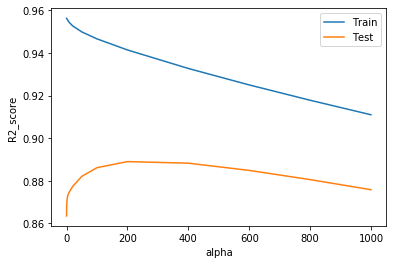

In [47]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
## Plotting R2 score vs alpha values
plt.plot(cv_result_train_ridge['param_alpha'], cv_result_train_ridge['mean_train_score'], label='Train')
plt.plot(cv_result_train_ridge['param_alpha'], cv_result_train_ridge['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

#### Lasso Regression

We can see optimal value for lambda between 200-600 after which r2 score starts declining.

In [48]:
#lasso
lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso,
                        param_grid=params,
                        scoring="r2",
                        cv=5,
                        verbose=1,
                        return_train_score=True
                       )
lassoCV.fit(X_train,y_train)  

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 400, 600, 800, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
cv_result_train_lasso = pd.DataFrame(lassoCV.cv_results_)
cv_result_train_lasso.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.219202      0.042716         0.004827        0.006326      0.0001   
1       0.172691      0.035915         0.000000        0.000000       0.001   
2       0.039752      0.030048         0.006243        0.007646        0.01   
3       0.034530      0.018264         0.009373        0.007653        0.05   
4       0.029813      0.025509         0.006251        0.007656         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.902840           0.879538           0.878988   
1   {'alpha': 0.001}           0.921044           0.887891           0.893461   
2    {'alpha': 0.01}           0.924894           0.879647           0.893996   
3    {'alpha': 0.05}           0.814086           0.781053           0.800522   
4     {'alpha': 0.1}           0.662385           0.655311           0.674875   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.851316  ...         0.873857        0.018463                3   
1           0.880475  ...         0.888192        0.020361                1   
2           0.856929  ...         0.887029        0.022347                2   
3           0.757834  ...         0.787115        0.019114                4   
4           0.638163  ...         0.660073        0.012795                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.950286            0.957782            0.954064   
1            0.944552            0.950761            0.948779   
2            0.900543            0.913437            0.908473   
3            0.781616            0.799412            0.795707   
4            0.643978            0.672716            0.664374   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.958775            0.956972          0.955576         0.003076  
1            0.950089            0.950861          0.949009         0.002349  
2            0.911269            0.913807          0.909506         0.004868  
3            0.807773            0.804545          0.797811         0.009098  
4            0.678567            0.685986          0.669124         0.014431  

[5 rows x 21 columns]

In [50]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [51]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [52]:
y_train_pred = lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
r2_train_lasso=r2_score(y_train, y_train_pred)
r2_test_lasso=r2_score(y_test, y_test_pred)
print("R-Squared (Train) =", '%.2f' % r2_train_lasso)
print("R-Squared (Test) =", '%.2f' % r2_test_lasso)
rss_train_lasso = np.sum(np.square(y_train - y_train_pred))
rss_test_lasso = np.sum(np.square(y_test - y_test_pred))
print("RSS (Train) =", '%.2f' % rss_train_lasso)
print("RSS (Test) =", '%.2f' % rss_test_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred)
mse_test_lasso = mean_squared_error(y_test, y_test_pred)
print("MSE (Train) =", '%.2f' % mse_train_lasso)
print("MSE (Test) =", '%.2f' % mse_test_lasso)
rmse_train_lasso = mse_train_lasso**0.5
rmse_test_lasso = mse_test_lasso**0.5
print("RMSE (Train) =", '%.2f' % rmse_train_lasso) 
print("RMSE (Test) =", '%.2f' % rmse_test_lasso) 

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 7.09
RSS (Test) = 4.67
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


#### Plotting R2 score vs alpha values

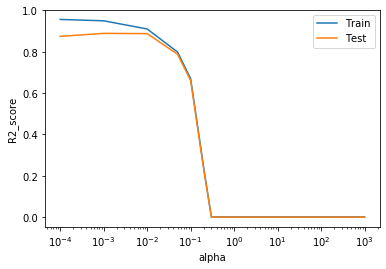

In [53]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
## Plotting R2 score vs alpha values
plt.plot(cv_result_train_lasso['param_alpha'], cv_result_train_lasso['mean_train_score'], label='Train')
plt.plot(cv_result_train_lasso['param_alpha'], cv_result_train_lasso['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

We can see optimal value for lambda between 10^-2-10^-1 after which r2 score starts declining.

In [54]:
scores = pd.DataFrame(index=['R-Squared (Train)',
'R-Squared (Test)',
'RSS (Train)',
'RSS (Test)', 'MSE (Train)',
'MSE (Test)',
'RMSE (Train)',
'RMSE (Test)'])
scores.rows = ['R-Squared (Train)',
'R-Squared (Test)',
'RSS (Train)',
'RSS (Test)', 'MSE (Train)',
'MSE (Test)',
'RMSE (Train)',
'RMSE (Test)']
scores['RFE(predictors=50)']=[r2_train_rfe,r2_test_rfe,rss_train_rfe,rss_test_rfe,mse_train_rfe,mse_test_rfe,rmse_train_rfe,rmse_test_rfe]
scores['Ridge(alpha=200)']=[r2_train_ridge,r2_test_ridge,rss_train_ridge,rss_test_ridge,mse_train_ridge,mse_test_ridge,rmse_train_ridge,rmse_test_ridge]
scores['Lasso(alpha=0.001)']=[r2_train_lasso,r2_test_lasso,rss_train_lasso,rss_test_lasso,mse_train_lasso,mse_test_lasso,rmse_train_lasso,rmse_test_lasso]
scores


RFE(predictors=50)  Ridge(alpha=200)  Lasso(alpha=0.001)
R-Squared (Train)        9.149113e-01          0.938726            0.944033
R-Squared (Test)        -1.796047e+22          0.919145            0.914382
RSS (Train)              1.077707e+01          7.760769            7.088602
RSS (Test)               9.799818e+23          4.411701            4.671624
MSE (Train)              1.055541e-02          0.007601            0.006943
MSE (Test)               2.237401e+21          0.010072            0.010666
RMSE (Train)             1.027395e-01          0.087185            0.083323
RMSE (Test)              4.730118e+10          0.100361            0.103275

In [55]:
pd.set_option('display.max_rows', 300)
betas_ridge = pd.DataFrame(index=X_train.columns)
betas_ridge.rows = X_train.columns
betas_ridge['Ridge_coef'] = ridge.coef_
print(betas_ridge.sort_values(by=['Ridge_coef'] ))


                                                    Ridge_coef
OverallQual_Below Average                            -0.016778
YearRemodAdd_Age                                     -0.016141
Neighborhood_MeadowV                                 -0.015862
OverallCond_Below Average                            -0.015008
Neighborhood_Edwards                                 -0.014075
OverallQual_Average                                  -0.013841
OverallCond_Fair                                     -0.013407
OverallCond_Average                                  -0.012539
Age                                                  -0.012253
YearBuilt_Age                                        -0.011988
HeatingQC_TA                                         -0.011613
ExterQual_TA                                         -0.010125
KitchenQual_TA                                       -0.009827
Neighborhood_NAmes                                   -0.009724
MSSubClass_1-STORY 1945 & OLDER                      -0

In [56]:

betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.rows = X_train.columns
betas_lasso['Lasso_coef'] = lasso.coef_
print(betas_lasso.sort_values(by=['Lasso_coef'] ))


                                                      Lasso_coef
Age                                                -4.841825e-02
OverallCond_Average                                -1.964263e-02
OverallCond_Below Average                          -1.907923e-02
YearRemodAdd_Age                                   -1.794645e-02
OverallQual_Below Average                          -1.747577e-02
Neighborhood_MeadowV                               -1.707177e-02
OverallCond_Fair                                   -1.647139e-02
OverallQual_Average                                -1.386373e-02
Neighborhood_Edwards                               -1.281051e-02
BsmtUnfSF                                          -1.146914e-02
OverallCond_Poor                                   -1.125879e-02
MSSubClass_DUPLEX - ALL STYLES AND AGES            -1.102546e-02
HeatingQC_TA                                       -1.004711e-02
ExterQual_TA                                       -8.845304e-03
MSSubClass_2-STORY PUD - 

### Conclusion
1. Optimum value for lambda in ridge regression is 200
2. Optimum value for lambda in lasso regression is 0.001
3. r2_score in train dataset: r2_score for ridge: 0.938, r2_score for lasso: 0.944
4. r2_score in test dataset: r2_score for ridge: 0.919, r2_score for lasso: 0.914
5. Using Ridge the top 5 +ve coefficients are for 
    * OverallQual_Excellent         -->                         0.020271
    * OverallQual_Very Good          -->                        0.024191
    * 1stFlrSF                      -->                         0.027782
    * TotalBsmtSF                    -->                        0.028167
    * GrLivArea                    -->                          0.044738
6. and top 5 -ve coefficients for Ridge are : 
    * OverallQual_Below Average -->                             -0.016778
    * YearRemodAdd_Age          -->                            -0.016141
    * Neighborhood_MeadowV     -->                             -0.015862
    * OverallCond_Below Average  -->                           -0.015008
    * Neighborhood_Edwards      -->                            -0.014075
7. Using Lasso the top 5 +ve coefficients are for 
    * RoofMatl_WdShngl       -->                              2.875691e-02
    * OverallQual_Very Good   -->                             3.267919e-02
    * RoofMatl_CompShg        -->                              3.686069e-02
    * TotalBsmtSF             -->                            4.365792e-02
    * GrLivArea                -->                             1.113557e-01
8. and top 5 -ve coefficients for Lasso are :
    * Age                        -->                          -4.841825e-02
    * OverallCond_Average        -->                          -1.964263e-02
    * OverallCond_Below Average   -->                        -1.907923e-02
    * YearRemodAdd_Age            -->                         -1.794645e-02
    * OverallQual_Below Average   -->                         -1.747577e-02

# Advance Regression Assignment-Part 2

### Question 1

##### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [57]:
ridge2 = Ridge(alpha=400)
ridge2.fit(X_train, y_train)

Ridge(alpha=400)

In [58]:
y_train_pred = ridge2.predict(X_train)
y_test_pred=ridge2.predict(X_test)
r2_train_ridge2=r2_score(y_train, y_train_pred)
r2_test_ridge2=r2_score(y_test, y_test_pred)
print("R-Squared (Train) =", '%.2f' % r2_train_ridge2)
print("R-Squared (Test) =", '%.2f' % r2_test_ridge2)
rss_train_ridge2 = np.sum(np.square(y_train - y_train_pred))
rss_test_ridge2 = np.sum(np.square(y_test - y_test_pred))
print("RSS (Train) =", '%.2f' % rss_train_ridge2)
print("RSS (Test) =", '%.2f' % rss_test_ridge2)
mse_train_ridge2 = mean_squared_error(y_train, y_train_pred)
mse_test_ridge2 = mean_squared_error(y_test, y_test_pred)
print("MSE (Train) =", '%.2f' % mse_train_ridge2)
print("MSE (Test) =", '%.2f' % mse_test_ridge2)
rmse_train_ridge2 = mse_train_ridge2**0.5
rmse_test_ridge2 = mse_test_ridge2**0.5
print("RMSE (Train) =", '%.2f' % rmse_train_ridge2) 
print("RMSE (Test) =", '%.2f' % rmse_test_ridge2) 


R-Squared (Train) = 0.93
R-Squared (Test) = 0.92
RSS (Train) = 8.64
RSS (Test) = 4.42
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [59]:
lasso2 = Lasso(alpha=0.002)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.002)

In [60]:
y_train_pred = lasso2.predict(X_train)
y_test_pred=lasso2.predict(X_test)
r2_train_lasso2=r2_score(y_train, y_train_pred)
r2_test_lasso2=r2_score(y_test, y_test_pred)
print("R-Squared (Train) =", '%.2f' % r2_train_lasso2)
print("R-Squared (Test) =", '%.2f' % r2_test_lasso2)
rss_train_lasso2 = np.sum(np.square(y_train - y_train_pred))
rss_test_lasso2 = np.sum(np.square(y_test - y_test_pred))
print("RSS (Train) =", '%.2f' % rss_train_lasso2)
print("RSS (Test) =", '%.2f' % rss_test_lasso2)
mse_train_lasso2 = mean_squared_error(y_train, y_train_pred)
mse_test_lasso2 = mean_squared_error(y_test, y_test_pred)
print("MSE (Train) =", '%.2f' % mse_train_lasso2)
print("MSE (Test) =", '%.2f' % mse_test_lasso2)
rmse_train_lasso2 = mse_train_lasso2**0.5
rmse_test_lasso2 = mse_test_lasso2**0.5
print("RMSE (Train) =", '%.2f' % rmse_train_lasso2) 
print("RMSE (Test) =", '%.2f' % rmse_test_lasso2) 

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 7.93
RSS (Test) = 4.20
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [61]:
scores['Ridge2(alpha=400)']=[r2_train_ridge2,r2_test_ridge2,rss_train_ridge2,rss_test_ridge2,mse_train_ridge2,mse_test_ridge2,rmse_train_ridge2,rmse_test_ridge2]
scores['Lasso2(alpha=0.002)']=[r2_train_lasso2,r2_test_lasso2,rss_train_lasso2,rss_test_lasso2,mse_train_lasso2,mse_test_lasso2,rmse_train_lasso2,rmse_test_lasso2]
scores

RFE(predictors=50)  Ridge(alpha=200)  Lasso(alpha=0.001)  \
R-Squared (Train)        9.149113e-01          0.938726            0.944033   
R-Squared (Test)        -1.796047e+22          0.919145            0.914382   
RSS (Train)              1.077707e+01          7.760769            7.088602   
RSS (Test)               9.799818e+23          4.411701            4.671624   
MSE (Train)              1.055541e-02          0.007601            0.006943   
MSE (Test)               2.237401e+21          0.010072            0.010666   
RMSE (Train)             1.027395e-01          0.087185            0.083323   
RMSE (Test)              4.730118e+10          0.100361            0.103275   

                   Ridge2(alpha=400)  Lasso2(alpha=0.002)  
R-Squared (Train)           0.931748             0.937398  
R-Squared (Test)            0.918906             0.923050  
RSS (Train)                 8.644639             7.929026  
RSS (Test)                  4.424768             4.198625  
MSE (Train)                 0.008467             0.007766  
MSE (Test)                  0.010102             0.009586  
RMSE (Train)                0.092015             0.088125  
RMSE (Test)                 0.100510             0.097908

In [62]:
betas_ridge2 = pd.DataFrame(index=X_train.columns)
betas_ridge2.rows = X_train.columns
betas_ridge2['Ridge2_coef'] = ridge2.coef_
print(betas_ridge2.sort_values(by=['Ridge2_coef'] ))

                                                    Ridge2_coef
OverallQual_Below Average                             -0.015389
YearRemodAdd_Age                                      -0.015380
Neighborhood_MeadowV                                  -0.013645
OverallCond_Below Average                             -0.013055
OverallQual_Average                                   -0.012634
Neighborhood_Edwards                                  -0.012556
OverallCond_Fair                                      -0.011603
ExterQual_TA                                          -0.011557
HeatingQC_TA                                          -0.011040
KitchenQual_TA                                        -0.010173
Age                                                   -0.009917
YearBuilt_Age                                         -0.009752
MSSubClass_1-STORY 1945 & OLDER                       -0.009722
BsmtQual_TA                                           -0.008989
OverallCond_Average                     

In [63]:
betas_lasso2 = pd.DataFrame(index=X_train.columns)
betas_lasso2.rows = X_train.columns
betas_lasso2['Lasso2_coef'] = lasso2.coef_
print(betas_lasso2.sort_values(by=['Lasso2_coef'] ))

                                                     Lasso2_coef
Age                                                -4.346727e-02
YearRemodAdd_Age                                   -1.974009e-02
OverallCond_Below Average                          -1.818919e-02
OverallQual_Below Average                          -1.797100e-02
OverallCond_Average                                -1.659992e-02
OverallCond_Fair                                   -1.611970e-02
Neighborhood_MeadowV                               -1.515563e-02
OverallQual_Average                                -1.353883e-02
ExterQual_TA                                       -1.227214e-02
MSSubClass_DUPLEX - ALL STYLES AND AGES            -1.216802e-02
Neighborhood_Edwards                               -1.082857e-02
OverallCond_Poor                                   -9.344519e-03
MSZoning_RM                                        -8.992417e-03
HeatingQC_TA                                       -8.723487e-03
MSSubClass_2-STORY PUD - 

3. r2_score in train dataset: r2_score for ridge: 0.9317, r2_score for lasso: 0.9373
4. r2_score in test dataset: r2_score for ridge: 0.9189, r2_score for lasso: 0.923
5. Using Ridge the top 5 +ve coefficients are for 
    * OverallQual_Below Average    -->                          -0.015389
    * YearRemodAdd_Age              -->                         -0.015380
    * Neighborhood_MeadowV         -->                          -0.013645
    * OverallCond_Below Average    -->                          -0.013055
    * OverallQual_Average          -->                          -0.012634
6. and top 5 -ve coefficients for Ridge are : 
    * OverallQual_Excellent        -->                           0.018677
    * OverallQual_Very Good        -->                           0.020880
    * TotalBsmtSF                  -->                           0.025316
    * 1stFlrSF                     -->                           0.026092
    * GrLivArea                    -->                           0.037091
7. Using Lasso the top 5 +ve coefficients are for 
    * BsmtFinSF1                  -->                          2.571180e-02
    * OverallQual_Excellent        -->                         2.634795e-02
    * OverallQual_Very Good       -->                          3.345817e-02
    * TotalBsmtSF                 -->                          3.870722e-02
    * GrLivArea                    -->                         1.101390e-01
8. and top 5 -ve coefficients for Lasso are :
    * Age                        -->                          -4.346727e-02
    * YearRemodAdd_Age            -->                         -1.974009e-02
    * OverallCond_Below Average   -->                         -1.818919e-02
    * OverallQual_Below Average   -->                         -1.797100e-02
    * OverallCond_Average          -->                        -1.659992e-02



### Question 2

##### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

The model scores are almost similar ,so the model we will choose to apply will depend on the use case.
    * If we have too many variables and our primary goal is feature selection, then we will use Lasso.
    * If we don't want to get too large coefficients and want to keep all the predictors along with reduction of coefficient magnitude is one of our primary goals, then we will use Ridge Regression


### Question 3

##### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [64]:
col_drop=['GrLivArea','TotalBsmtSF','RoofMatl_CompShg','OverallQual_Very Good','RoofMatl_WdShngl']
# Modify the X_train and X_test
X_train_alt = X_train.drop(col_drop, axis=1)
X_test_alt = X_test.drop(col_drop, axis=1)



In [65]:
#lasso
lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso,
                        param_grid=params,
                        scoring="r2",
                        cv=5,
                        verbose=1,
                        return_train_score=True
                       )
lassoCV.fit(X_train_alt,y_train)  
lassoCV.best_params_

Fitting 5 folds for each of 31 candidates, totalling 155 fits


{'alpha': 0.001}

In [66]:
lasso3 = Lasso(alpha=0.001)
lasso3.fit(X_train_alt, y_train)
y_train_pred = lasso3.predict(X_train_alt)
y_test_pred=lasso3.predict(X_test_alt)
r2_train_lasso3=r2_score(y_train, y_train_pred)
r2_test_lasso3=r2_score(y_test, y_test_pred)
print("R-Squared (Train) =", '%.2f' % r2_train_lasso3)
print("R-Squared (Test) =", '%.2f' % r2_test_lasso3)
rss_train_lasso3 = np.sum(np.square(y_train - y_train_pred))
rss_test_lasso3 = np.sum(np.square(y_test - y_test_pred))
print("RSS (Train) =", '%.2f' % rss_train_lasso3)
print("RSS (Test) =", '%.2f' % rss_test_lasso3)
mse_train_lasso3 = mean_squared_error(y_train, y_train_pred)
mse_test_lasso3 = mean_squared_error(y_test, y_test_pred)
print("MSE (Train) =", '%.2f' % mse_train_lasso3)
print("MSE (Test) =", '%.2f' % mse_test_lasso3)
rmse_train_lasso3 = mse_train_lasso3**0.5
rmse_test_lasso3 = mse_test_lasso3**0.5
print("RMSE (Train) =", '%.2f' % rmse_train_lasso3) 
print("RMSE (Test) =", '%.2f' % rmse_test_lasso3) 

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 8.20
RSS (Test) = 4.78
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [67]:
scores['Lasso(alpha=0.001,without top 5)']=[r2_train_lasso3,r2_test_lasso3,rss_train_lasso3,rss_test_lasso3,mse_train_lasso3,mse_test_lasso3,rmse_train_lasso3,rmse_test_lasso3]
scores

RFE(predictors=50)  Ridge(alpha=200)  Lasso(alpha=0.001)  \
R-Squared (Train)        9.149113e-01          0.938726            0.944033   
R-Squared (Test)        -1.796047e+22          0.919145            0.914382   
RSS (Train)              1.077707e+01          7.760769            7.088602   
RSS (Test)               9.799818e+23          4.411701            4.671624   
MSE (Train)              1.055541e-02          0.007601            0.006943   
MSE (Test)               2.237401e+21          0.010072            0.010666   
RMSE (Train)             1.027395e-01          0.087185            0.083323   
RMSE (Test)              4.730118e+10          0.100361            0.103275   

                   Ridge2(alpha=400)  Lasso2(alpha=0.002)  \
R-Squared (Train)           0.931748             0.937398   
R-Squared (Test)            0.918906             0.923050   
RSS (Train)                 8.644639             7.929026   
RSS (Test)                  4.424768             4.198625   
MSE (Train)                 0.008467             0.007766   
MSE (Test)                  0.010102             0.009586   
RMSE (Train)                0.092015             0.088125   
RMSE (Test)                 0.100510             0.097908   

                   Lasso(alpha=0.001,without top 5)  
R-Squared (Train)                          0.935253  
R-Squared (Test)                           0.912402  
RSS (Train)                                8.200712  
RSS (Test)                                 4.779618  
MSE (Train)                                0.008032  
MSE (Test)                                 0.010912  
RMSE (Train)                               0.089622  
RMSE (Test)                                0.104462

In [68]:
betas_lasso3 = pd.DataFrame(index=X_train_alt.columns)
betas_lasso3.rows = X_train_alt.columns
betas_lasso3['Lasso3_coef'] = lasso3.coef_
print(betas_lasso3.sort_values(by=['Lasso3_coef'] ))

                                                    Lasso3_coef
Age                                                   -0.042979
OverallQual_Below Average                             -0.020268
OverallCond_Below Average                             -0.018564
OverallQual_Average                                   -0.018536
Neighborhood_MeadowV                                  -0.018179
OverallCond_Average                                   -0.017875
ExterQual_TA                                          -0.016511
OverallCond_Fair                                      -0.016364
Neighborhood_Edwards                                  -0.015789
YearRemodAdd_Age                                      -0.015478
MSSubClass_2-STORY PUD - 1946 & NEWER                 -0.015465
Exterior1st_Wd Sdng                                   -0.011877
MSSubClass_DUPLEX - ALL STYLES AND AGES               -0.010573
KitchenQual_Gd                                        -0.010481
Neighborhood_NAmes                      

1. r2_score in train dataset: 0.935, r2_score in test dataset: 0.912
2. New top 5 features are as below:
    * LotArea              -->                                  0.023137
    * Neighborhood_NridgHt -->                                  0.026026
    * BsmtFinSF1           -->                                  0.043300
    * 2ndFlrSF             -->                                  0.087073
    * 1stFlrSF             -->                                  0.094959

### Question 4

##### How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

A robust model is one where any variation in the data does not affect its performance much.
A generalizable model successfully adapts to data sets other than the one used for training and testing..
To make sure a model is robust and generalizable, we have to make sure model doesn’t overfit on training data as overfitting model has very high variance and change in data degrades the accuracy of the model. An overfitted model will identify all the patterns of a training data, but fail to pick up the patterns in unseen test data.
In general, balance between model accuracy and complexity is required. This can be achieved by Regularization techniques like Ridge Regression and Lasso. Also using cross validation methods like K-Fold Cross validation with GridSearch cross validation helps to find the best fit hyperparameters for  Regularized Regression models.
